In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import tqdm


env = gym.make("MountainCar-v0", render_mode="human")


def mountaincar(discretisationfactor_pos,discretisationfactor_vel,alpha,gamma,num_episodes):
    learning_rate = alpha
    discount_factor = gamma
    
    n = discretisationfactor_pos  # discretization factor for position
    nv = discretisationfactor_vel  # discretization factor for velocity

    pos_rows = int((1.2 + 0.6) / n) + 1  # num of rows for position
    vel_rows = int((0.07 + 0.07) / nv) + 1  # num of rows for velocity
    cols = env.action_space.n
    
    q_values=np.zeros((pos_rows, vel_rows ,cols))
    
    rewardlist=np.zeros(num_episodes)

    for i in (range(num_episodes)):
        if (i%1000==0): print(f"{i} episodes")
        if(i>=9000): env.render()
        epsilon = 1/(i+1) #epsilon decay
        total_reward=0

        state=env.reset()[0]
        # print((state[0]/n)//1+12)
        done = False
        
        while not done:
            # action chosen according to epsilon-greedy policy
            # print(f"state is {state}")
            
            
            # discretised_position = int(round(state[0]/n,2))
            # shift_pos=int(round(1.2/n,2))
            # pos_row=discretised_position + shift_pos

            #discretising states
            pos_row=int((state[0]+1.2)/n)
            vel_row=int((state[1]+0.07)/nv)


            # discretised_velocity = int(round(state[1]/nv,2))
            # shift_vel=int(round(0.07/nv))
            # vel_row=discretised_velocity + shift_vel
            # # print(f"pos and vel rows are {pos_row,vel_row}")
            
            if np.random.uniform(0,1)<epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_values[pos_row,vel_row])        
            
            new_state,reward,terminated,truncated,info = env.step(action)
            # print(f"{new_state}")
            done = truncated or terminated                                      #becomes true when episode terminates or gets truncated
            total_reward+=reward

            # discretised_newposition = int(round(new_state[0]/n,2))
            # new_pos_row=discretised_newposition+shift_pos

            # discretised_newvelocity = int(round(new_state[1]/nv,2))
            # new_vel_row=discretised_newvelocity + shift_vel
            
            # discretising new states
            new_pos_row=int((new_state[0]+1.2)/n)
            new_vel_row=int((new_state[1]+0.07)/nv)
            
            #update the q_values according to the Q-policy
            q_values[pos_row,vel_row,action]+= learning_rate*(reward + discount_factor*np.max(q_values[new_pos_row,new_vel_row])-q_values[pos_row,vel_row,action])

            state=new_state
            
        # print(f"The reward in episode {i} is {total_reward}")
        rewardlist[i]=total_reward
    
    return rewardlist

In [8]:
episodelist=[i for i in range(10000)]

0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes


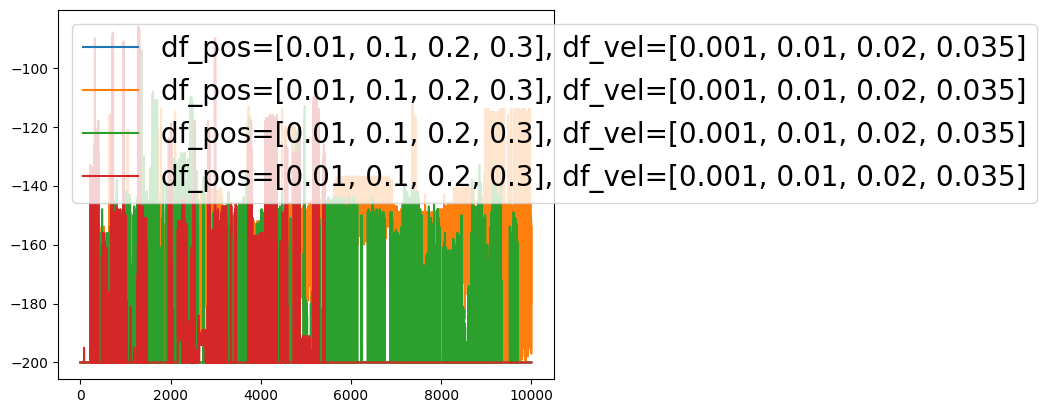

In [9]:
#varying discretisation factors
df_pos=[0.01,0.1,0.2,0.3]
df_vel=[0.001,0.01,0.02,0.035]
rewardlist_df=list()
for i in range(len(df_pos)):
    rewardlist_df.append(mountaincar(df_pos[i],df_vel[i],0.1,0.9,10000))


for j in range(len(df_pos)):
    plt.plot(episodelist,rewardlist_df[j],label=f"df_pos={df_pos}, df_vel={df_vel}") 

plt.legend(loc="upper left",prop={"size":20}) #prop sets the size to 20


    

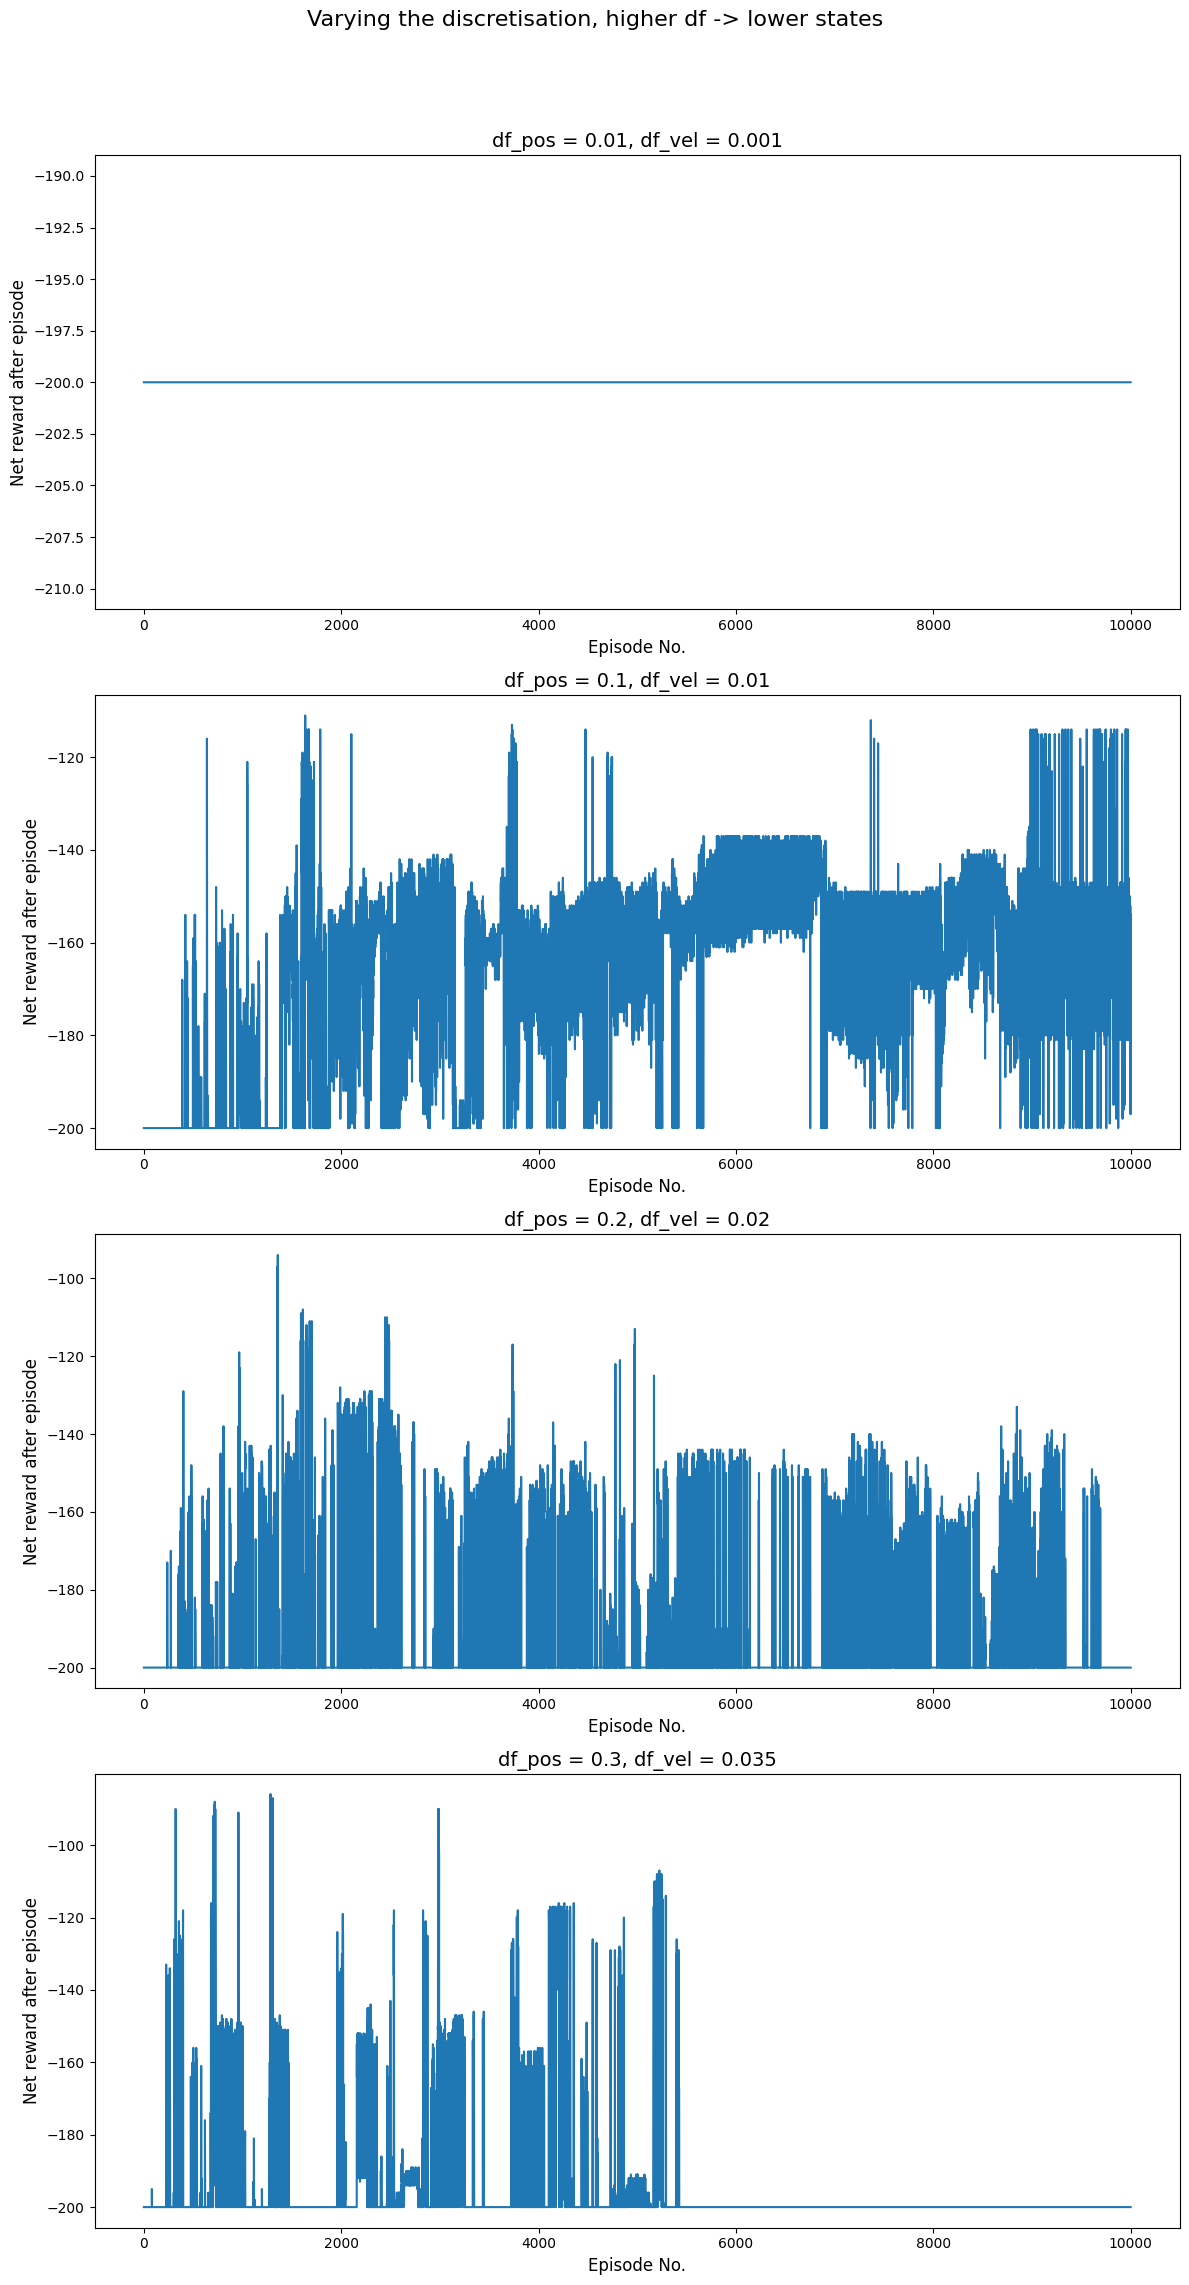

In [36]:
import matplotlib.pyplot as plt

# Create the subplots with adjusted figure size
fig, axs = plt.subplots(4, 1, figsize=(12, 24))  # Adjusted figure size for better readability

# Plot the data for each subplot
for i in range(4):
    axs[i].plot(episodelist, rewardlist_df[i])
    axs[i].set_title(f"df_pos = {df_pos[i]}, df_vel = {df_vel[i]}", fontsize=14)
    axs[i].set_xlabel("Episode No.", fontsize=12)
    axs[i].set_ylabel("Net reward after episode", fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)

# Set the main title for the figure
fig.suptitle("Varying the discretisation, higher df -> lower states", fontsize=16)

# Adjust the layout to prevent overlap and improve spacing
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()



In [20]:
lr=[0.001,0.01,0.1,1]
rewardlist_lr=list()
for i in range(4):
    rewardlist_lr.append(mountaincar(0.2,0.02,lr[i],0.9,10000))
    

0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes


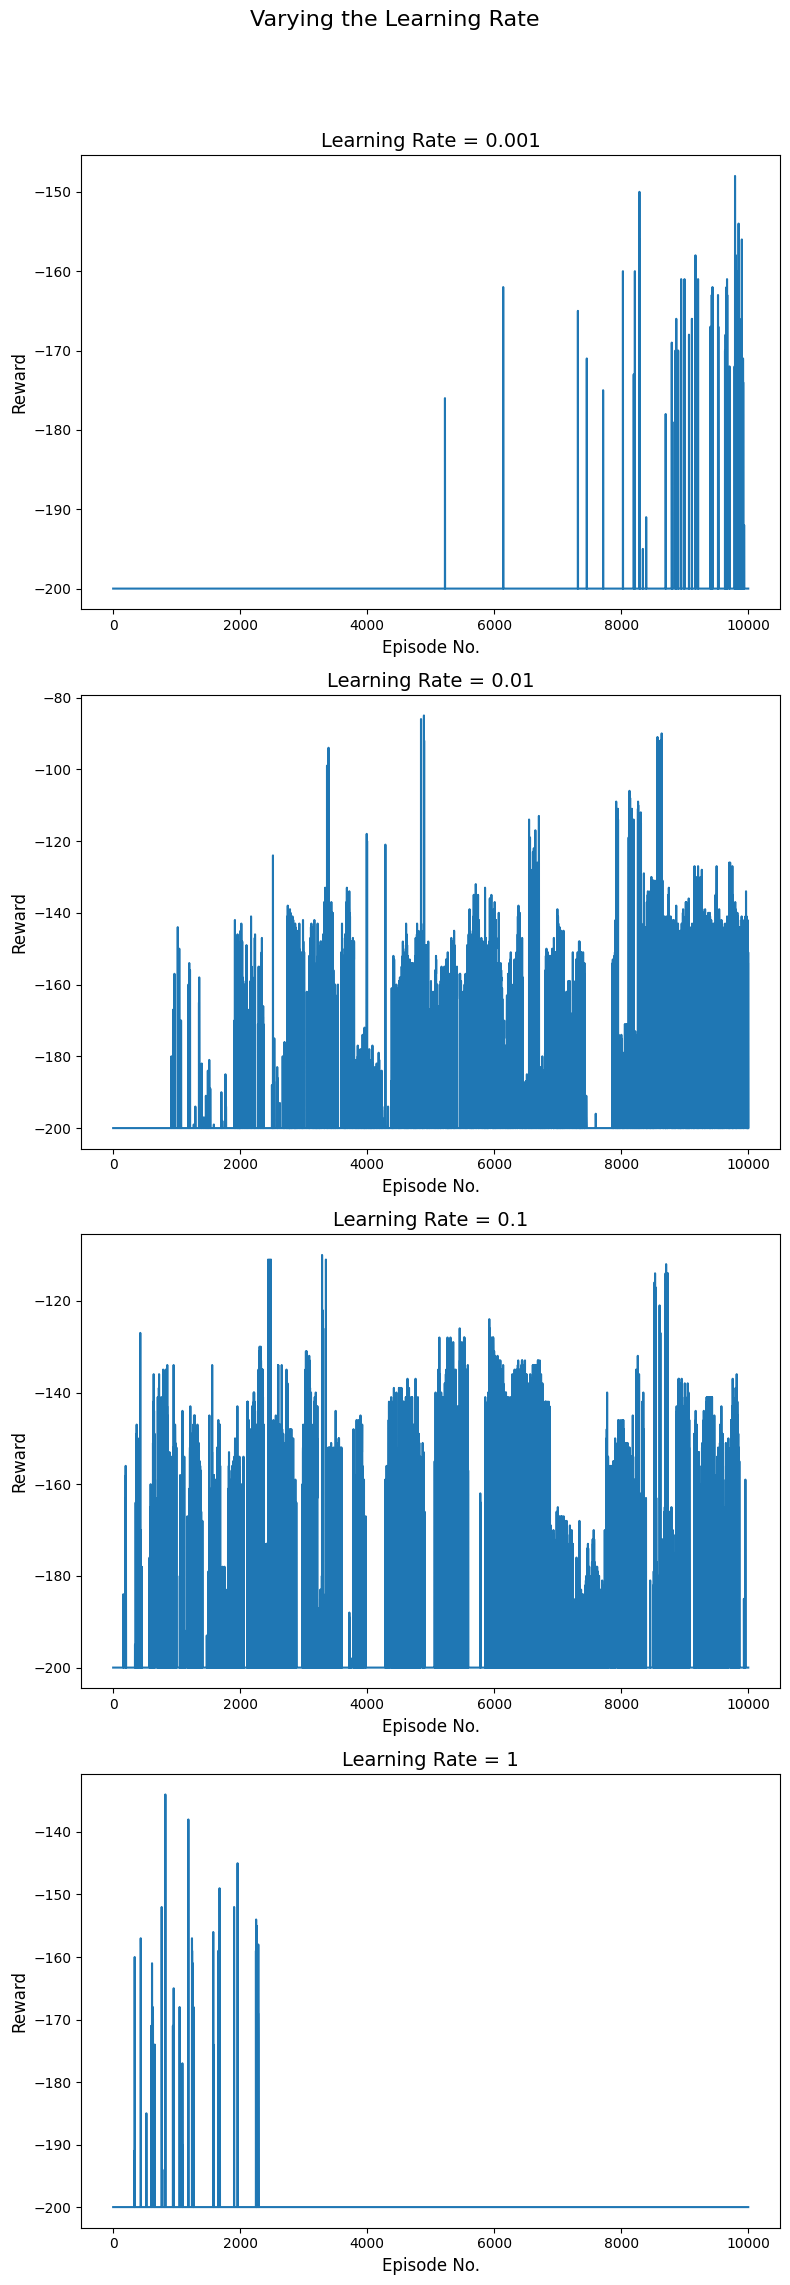

In [35]:
import matplotlib.pyplot as plt

# Create the subplots with adjusted figure size
fig, axs = plt.subplots(4, 1, figsize=(8, 24))  # Adjusted figure size for better readability

# Plot the data for each subplot
for i in range(4):
    axs[i].plot(episodelist, rewardlist_lr[i])
    axs[i].set_title(f"Learning Rate = {lr[i]}", fontsize=14)
    axs[i].set_xlabel("Episode No.", fontsize=12)
    axs[i].set_ylabel("Reward", fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)

# Set the main title for the figure
fig.suptitle("Varying the Learning Rate", fontsize=16)

# Adjust the layout to prevent overlap and improve spacing
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [22]:
discounts=[0,0.1,0.5,0.9,1]
rewardlist_disc=list()
for i in range(5):
    rewardlist_disc.append(mountaincar(0.2,0.02,0.01,discounts[i],10000))

0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes
0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes


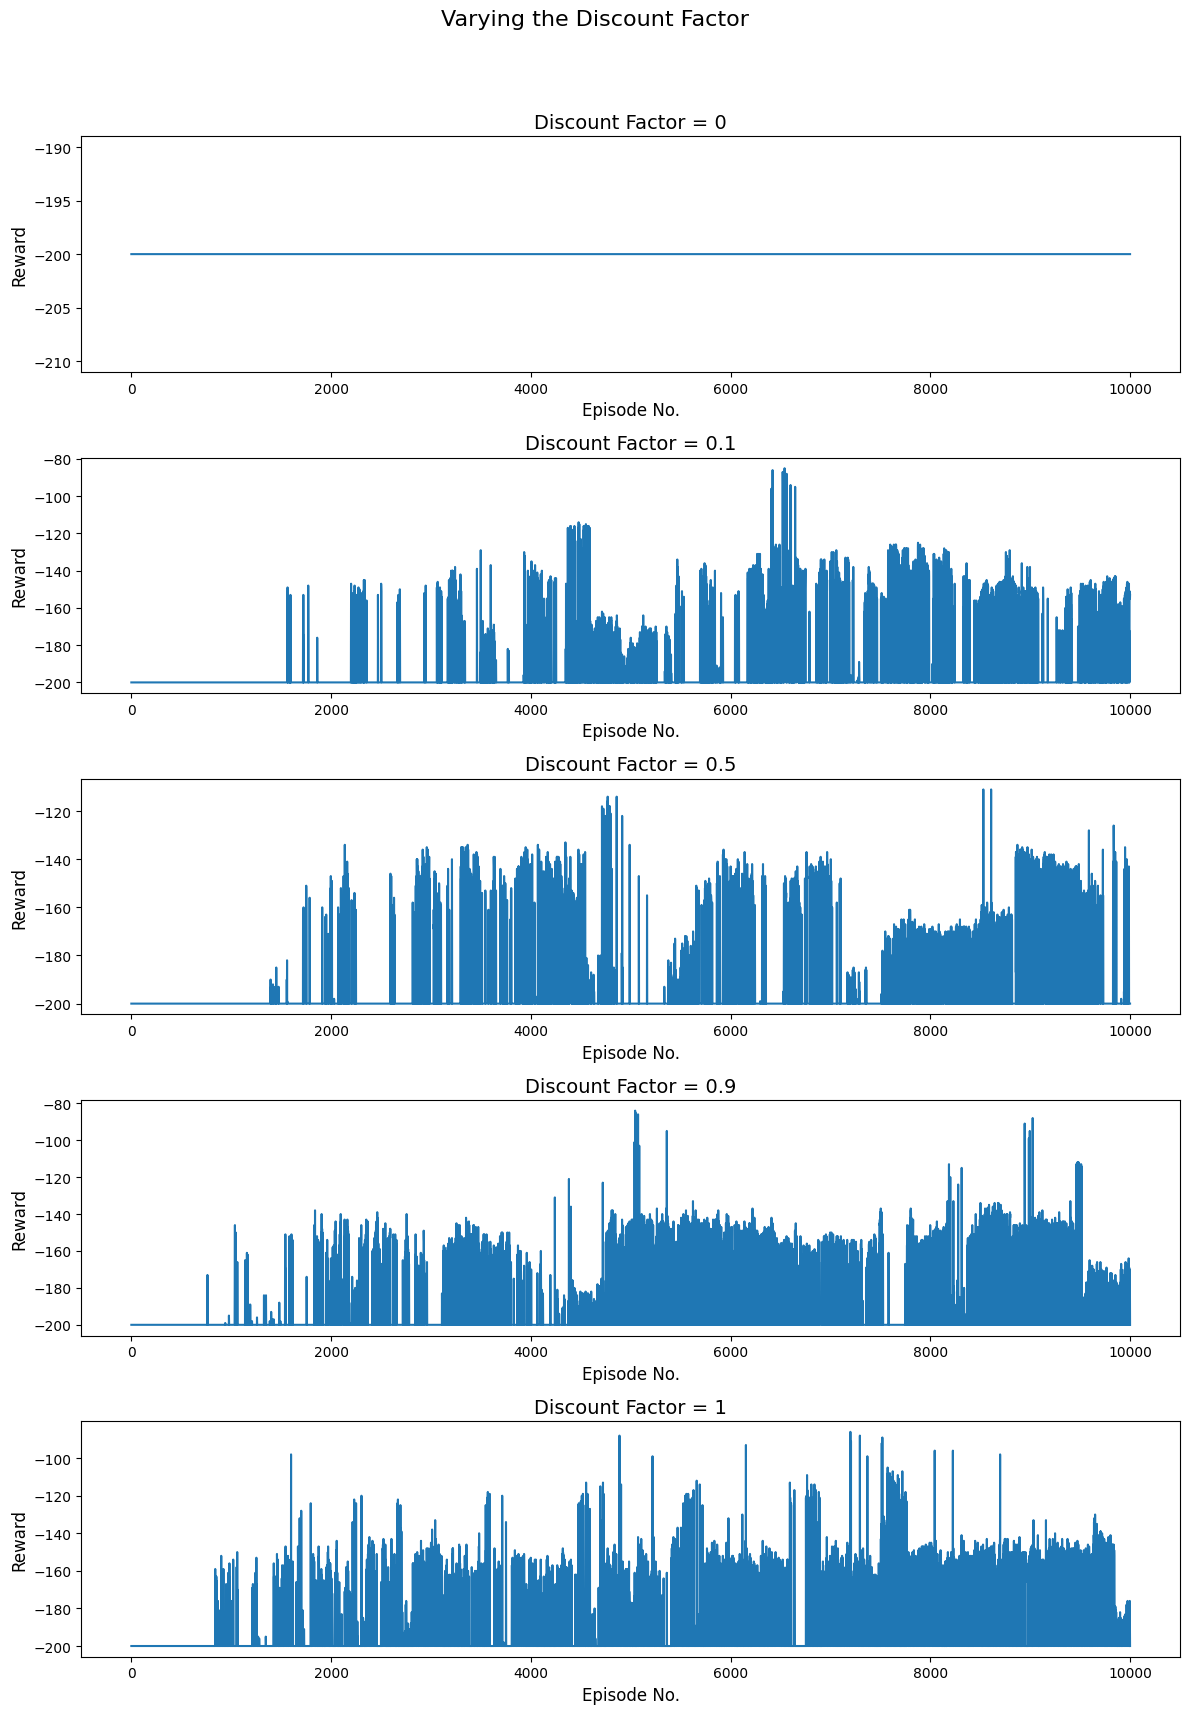

In [33]:
# Create the subplots with adjusted figure size
fig, axs = plt.subplots(5, 1, figsize=(12, 18))  # Adjusted figure size for better readability

# Plot the data for each subplot
for i in range(5):
    axs[i].plot(episodelist, rewardlist_disc[i])
    axs[i].set_title(f"Discount Factor = {discounts[i]}", fontsize=14)
    axs[i].set_xlabel("Episode No.", fontsize=12)
    axs[i].set_ylabel("Reward", fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)

fig.suptitle("Varying the Discount Factor", fontsize=16)

# Adjust the layout to prevent overlap and improve spacing
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


OBSERVATIONS

Hence it is observed that moderate discretisation, learning rate of 0.01 and discount factor of about 0.9 can give faster convergence.

In [2]:
#final_for rendering
rewardlist_final=mountaincar(0.2, 0.02, 0.01, 0.9, 10000)


0 episodes


KeyboardInterrupt: 

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import tqdm

env = gym.make("MountainCar-v0")
#to store q values so that can train on it further
def mountaincar_forFinalTraining(discretisationfactor_pos,discretisationfactor_vel,alpha,gamma,num_episodes):
    learning_rate = alpha
    discount_factor = gamma
    
    n = discretisationfactor_pos  # discretization factor for position
    nv = discretisationfactor_vel  # discretization factor for velocity

    pos_rows = int((1.2 + 0.6) / n) + 1  # num of rows for position
    vel_rows = int((0.07 + 0.07) / nv) + 1  # num of rows for velocity
    cols = env.action_space.n
    
    q_values=np.zeros((pos_rows, vel_rows ,cols))
    
    rewardlist=np.zeros(num_episodes)

    for i in (range(num_episodes)):
        if (i%1000==0): print(f"{i} episodes")
        epsilon = 1/(i+1) #epsilon decay
        total_reward=0

        state=env.reset()[0]
        # print((state[0]/n)//1+12)
        done = False
        
        while not done:
            # action chosen according to epsilon-greedy policy
            # print(f"state is {state}")
            
            
            # discretised_position = int(round(state[0]/n,2))
            # shift_pos=int(round(1.2/n,2))
            # pos_row=discretised_position + shift_pos

            #discretising states
            pos_row=int((state[0]+1.2)/n)
            vel_row=int((state[1]+0.07)/nv)


            # discretised_velocity = int(round(state[1]/nv,2))
            # shift_vel=int(round(0.07/nv))
            # vel_row=discretised_velocity + shift_vel
            # # print(f"pos and vel rows are {pos_row,vel_row}")
            
            if np.random.uniform(0,1)<epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_values[pos_row,vel_row])        
            
            new_state,reward,terminated,truncated,info = env.step(action)
            # print(f"{new_state}")
            done = truncated or terminated                                      #becomes true when episode terminates or gets truncated
            total_reward+=reward

            # discretised_newposition = int(round(new_state[0]/n,2))
            # new_pos_row=discretised_newposition+shift_pos

            # discretised_newvelocity = int(round(new_state[1]/nv,2))
            # new_vel_row=discretised_newvelocity + shift_vel
            
            # discretising new states
            new_pos_row=int((new_state[0]+1.2)/n)
            new_vel_row=int((new_state[1]+0.07)/nv)
            
            #update the q_values according to the Q-policy
            q_values[pos_row,vel_row,action]+= learning_rate*(reward + discount_factor*np.max(q_values[new_pos_row,new_vel_row])-q_values[pos_row,vel_row,action])

            state=new_state
            
        # print(f"The reward in episode {i} is {total_reward}")
        rewardlist[i]=total_reward
    
    return q_values

In [5]:
trained_agent_qvalues=mountaincar_forFinalTraining(0.2,0.02,0.01,0.9,10000)

0 episodes
1000 episodes
2000 episodes
3000 episodes
4000 episodes
5000 episodes
6000 episodes
7000 episodes
8000 episodes
9000 episodes


In [7]:
env = gym.make("MountainCar-v0", render_mode="human")
#to visualise progress
def mountaincar_toTrainFurther(trained_qvalues,discretisationfactor_pos,discretisationfactor_vel,alpha,gamma,num_episodes):
    learning_rate = alpha
    discount_factor = gamma
    
    n = discretisationfactor_pos  # discretization factor for position
    nv = discretisationfactor_vel  # discretization factor for velocity
    
    q_values=trained_qvalues
    
    rewardlist=np.zeros(num_episodes)

    for i in (range(num_episodes)):
        if (i%1000==0): print(f"{i} episodes")
        epsilon = 1/(i+1) #epsilon decay
        total_reward=0

        state=env.reset()[0]
        # print((state[0]/n)//1+12)
        done = False
        
        while not done:
            # action chosen according to epsilon-greedy policy
            # print(f"state is {state}")
            
            
            # discretised_position = int(round(state[0]/n,2))
            # shift_pos=int(round(1.2/n,2))
            # pos_row=discretised_position + shift_pos

            #discretising states
            pos_row=int((state[0]+1.2)/n)
            vel_row=int((state[1]+0.07)/nv)


            # discretised_velocity = int(round(state[1]/nv,2))
            # shift_vel=int(round(0.07/nv))
            # vel_row=discretised_velocity + shift_vel
            # # print(f"pos and vel rows are {pos_row,vel_row}")
            
            if np.random.uniform(0,1)<epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_values[pos_row,vel_row])        
            
            new_state,reward,terminated,truncated,info = env.step(action)
            # print(f"{new_state}")
            done = truncated or terminated                                      #becomes true when episode terminates or gets truncated
            total_reward+=reward

            # discretised_newposition = int(round(new_state[0]/n,2))
            # new_pos_row=discretised_newposition+shift_pos

            # discretised_newvelocity = int(round(new_state[1]/nv,2))
            # new_vel_row=discretised_newvelocity + shift_vel
            
            # discretising new states
            new_pos_row=int((new_state[0]+1.2)/n)
            new_vel_row=int((new_state[1]+0.07)/nv)
            
            #update the q_values according to the Q-policy
            q_values[pos_row,vel_row,action]+= learning_rate*(reward + discount_factor*np.max(q_values[new_pos_row,new_vel_row])-q_values[pos_row,vel_row,action])

            state=new_state
            
        # print(f"The reward in episode {i} is {total_reward}")
        rewardlist[i]=total_reward
    
    return q_values

In [1]:
furthertrained_qvalues=mountaincar_toTrainFurther(trained_agent_qvalues,0.2,0.02,0.1,0.9,1000)

NameError: name 'mountaincar_toTrainFurther' is not defined